In [1]:
library(arules) #연관규칙 라이브러리
data('Groceries') #식료품 거래 데이터셋 로딩
Groceries

Warning message:
"package 'arules' was built under R version 3.6.2"Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

In [2]:
summary(Groceries)
#9835 rows #거래내역

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

In [6]:
#apriori 빈말패턴알고리즘, 자주 발생하는 연관규칙을 발견하는 함수
groc.rules<- apriori(Groceries, parameter=list(supp=0.01,conf=0.3,target='rules'))
#writing ... [125 rule(s)] done [0.00s]. ->125개 규칙 발생

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [125 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [11]:
#상위 3개의 규칙 n=3 상위3개
as(head(sort(groc.rules,by=c('confidence','support')),n=3),
'data.frame')
#{citrus fruit,root vegetables} => {other vegetables} 

,rules,support,confidence,lift,count
90,"{citrus fruit,root vegetables} => {other vegetables}",0.01037112,0.5862069,3.029608,102
100,"{tropical fruit,root vegetables} => {other vegetables}",0.01230300,0.5845411,3.020999,121
70,"{curd,yogurt} => {whole milk}",0.01006609,0.5823529,2.279125,99


In [9]:
inspect(groc.rules) #연관규칙 상세 목록

      lhs                           rhs                   support confidence     lift count
[1]   {hard cheese}              => {whole milk}       0.01006609  0.4107884 1.607682    99
[2]   {butter milk}              => {other vegetables} 0.01037112  0.3709091 1.916916   102
[3]   {butter milk}              => {whole milk}       0.01159126  0.4145455 1.622385   114
[4]   {ham}                      => {whole milk}       0.01148958  0.4414062 1.727509   113
[5]   {sliced cheese}            => {whole milk}       0.01077783  0.4398340 1.721356   106
[6]   {oil}                      => {whole milk}       0.01128622  0.4021739 1.573968   111
[7]   {onions}                   => {other vegetables} 0.01423488  0.4590164 2.372268   140
[8]   {onions}                   => {whole milk}       0.01209964  0.3901639 1.526965   119
[9]   {berries}                  => {yogurt}           0.01057448  0.3180428 2.279848   104
[10]  {berries}                  => {other vegetables} 0.01026945  0.3088685 1.5

In [13]:
inspect(subset(groc.rules,lift>3)) #lift >3 조건만 선택
# 지지도 1.7% (전체 거래의 1.7% 비율)
#lift 3.04(단독으로 판매되는것보다 3배 더 발생)

    lhs                                  rhs                support   
[1] {beef}                            => {root vegetables}  0.01738688
[2] {citrus fruit,root vegetables}    => {other vegetables} 0.01037112
[3] {citrus fruit,other vegetables}   => {root vegetables}  0.01037112
[4] {tropical fruit,root vegetables}  => {other vegetables} 0.01230300
[5] {tropical fruit,other vegetables} => {root vegetables}  0.01230300
    confidence lift     count
[1] 0.3313953  3.040367 171  
[2] 0.5862069  3.029608 102  
[3] 0.3591549  3.295045 102  
[4] 0.5845411  3.020999 121  
[5] 0.3427762  3.144780 121  


Warning message:
"package 'arulesViz' was built under R version 3.6.2"Loading required package: grid
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus
Warning message:
"plot: Too many rules supplied. Only plotting the best 100 rules using 'support' (change control parameter max if needed)"

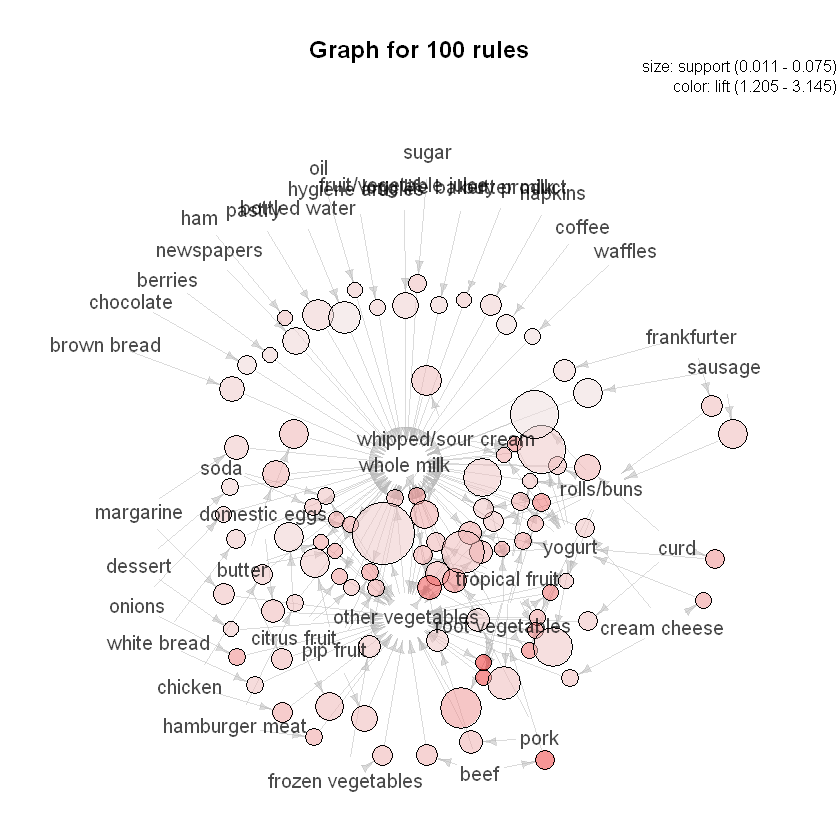

In [14]:
library(arulesViz)
plot(groc.rules,method='graph')

set of 5 rules 

    lhs          rhs                support    confidence lift     count
[1] {beef}    => {whole milk}       0.02125064 0.4050388  1.585180 209  
[2] {beef}    => {other vegetables} 0.01972547 0.3759690  1.943066 194  
[3] {beef}    => {root vegetables}  0.01738688 0.3313953  3.040367 171  
[4] {dessert} => {whole milk}       0.01372649 0.3698630  1.447514 135  
[5] {dessert} => {other vegetables} 0.01159126 0.3123288  1.614164 114  


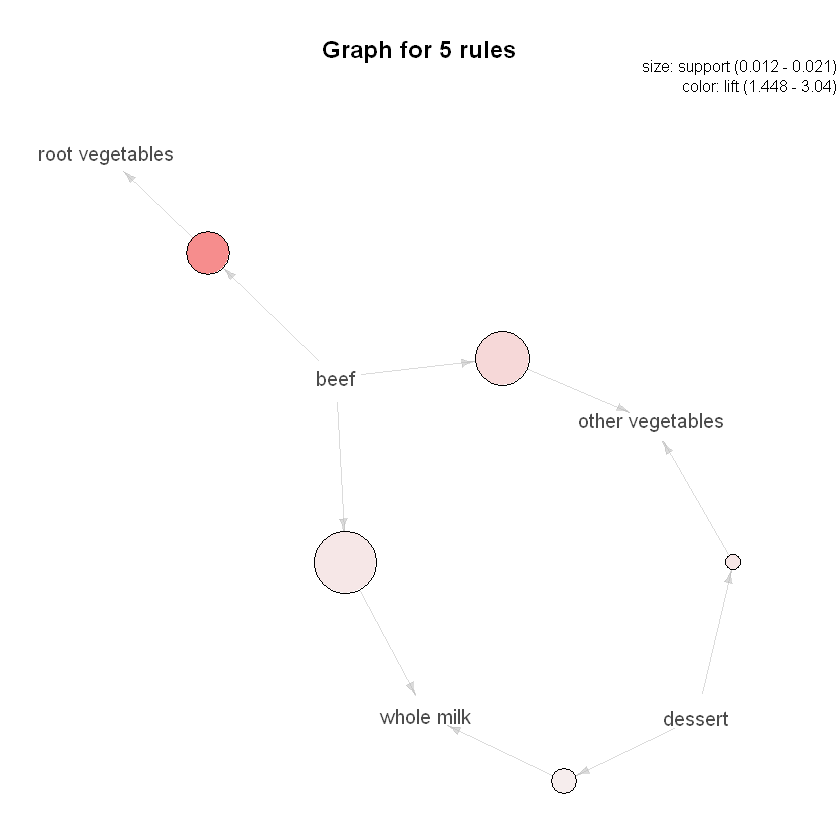

In [16]:
#왼쪽 아이템(A)이 beef or dessert
rules2<- subset(groc.rules, lhs %in% c('beef','dessert'))
rules2
#거래수 내림차순 정렬
inspect(sort(rules2,decreasing=T, by='count'))
plot(rules2, method='graph')